In [8]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import platform
import random
X, Y = loadlocal_mnist(
            images_path='TestImageFiles/train-images-idx3-ubyte', 
            labels_path='TestImageFiles/train-labels-idx1-ubyte')
Y = Y.reshape(60000,1)
random.seed(0)
chosen = random.sample(range(60000), 2000)
trainX = X[chosen]
trainY = Y[chosen]
onehotY = np.zeros((2000, 10))
for l in range(len(trainY)):
    onehotY[l, trainY[l]] = 1
print(Y)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [9]:

print(X.shape)
print(Y.shape)
Yind = np.array(range(0,60000,1)).reshape(60000, 1)

print(Yind.shape)
Yindnew = Yind[(Y == 0) | (Y == 1)].reshape(12665,1)
Xbinarytest = X[Yindnew].reshape(12665,784)
Ybinarytest = Y[Yindnew].reshape(12665,1)
chosen = np.array(random.sample(range(12655), 600)).reshape(600,1)
Xbinarytrain = Xbinarytest[chosen].reshape(600,784)/255
Xbinarytrain = np.transpose(Xbinarytrain)
print('test' + str(Xbinarytrain.shape))
Ybinarytrain = Ybinarytest[chosen].reshape(600,1)
print(str(max(Xbinarytrain[1])) + str(min(Xbinarytrain[1])))



(60000, 784)
(60000, 1)
(60000, 1)
test(784, 600)
0.00.0


(2000, 784)


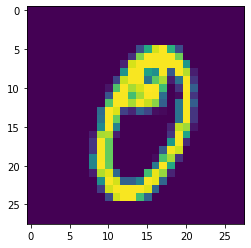

In [3]:
from matplotlib import image
from matplotlib import pyplot
print(trainX.shape)
finalshowimg = Xbinarytrain[:,1].reshape(28,28)
pyplot.imshow(finalshowimg)
# very important to test to make sure that the data is in the shape that we want. The reason that it wasn't training well was because it wasn't training on actual images

In [4]:
from FromScratch import *

def neuralnetwork(X, Y, dimensions, iterations = 3000, learning_rate = 0.05):
    X = np.squeeze(X)
    Y = np.squeeze(Y).reshape(600,1)
    print(Y.shape)
    params = initialize_params(dimensions)
    for i in range(iterations):
        AL, caches = model_forward(X, params)
        grads = model_backward(AL, Y, caches)
        params = update_parameters(params, grads, learning_rate)
        cost = compute_cost(AL,Y.T)
        if i % 100 == 0:
            print(f'Cost in epoch:{i} is {cost}')
    return params


In [82]:
dimensions = [784, 50, 50, 1]
parameters = neuralnetwork(Xbinarytrain, Ybinarytrain, dimensions = dimensions, iterations = 3000, learning_rate = 0.2)


(600, 1)
Cost in epoch:0 is 0.695553572478537
Cost in epoch:100 is 0.6504922754173982
Cost in epoch:200 is 0.6064370478872442
Cost in epoch:300 is 0.5584818277395761
Cost in epoch:400 is 0.5071969375149832
Cost in epoch:500 is 0.4552831844410863
Cost in epoch:600 is 0.4057390182951107
Cost in epoch:700 is 0.3605172568014701
Cost in epoch:800 is 0.3204396536701438
Cost in epoch:900 is 0.28571697428797027
Cost in epoch:1000 is 0.2559849991107949
Cost in epoch:1100 is 0.23065194089799756
Cost in epoch:1200 is 0.20906804689790648
Cost in epoch:1300 is 0.1906246691453437
Cost in epoch:1400 is 0.17479175157127672
Cost in epoch:1500 is 0.16110788729607634
Cost in epoch:1600 is 0.1492217735007309
Cost in epoch:1700 is 0.13882040246263283
Cost in epoch:1800 is 0.12966684974517909
Cost in epoch:1900 is 0.12157743762006043
Cost in epoch:2000 is 0.11438861630824645
Cost in epoch:2100 is 0.10796078448036232
Cost in epoch:2200 is 0.10219641669998526
Cost in epoch:2300 is 0.09700063257131818
Cost in 

In [83]:
def predict_single(parameters, examplenum):
    example = Xbinarytrain[:, examplenum].reshape(784,1)
    AL, caches = model_forward(example, parameters)
    pyplot.imshow(example.reshape(28,28))
    prediction = "Image is predicted {0}, predicted exact as{1}"
    if AL < 0.5:
        return prediction.format("0", AL)
    elif AL >= 0.5:
        return prediction.format("1", AL)
    
def predict_multiple(parameters, test_setX, test_setY, return_false_indexes = False):
    testlst = []
    wrongindlist = []
    test_imgs = test_setX
    AL, caches = model_forward(test_imgs, parameters)
    testresults = test_setY.reshape(AL.shape)
    AL[AL>=0.5] = 1
    AL[AL<0.5] = 0
    for i in range(AL.shape[1]):
        if AL[:,i] == testresults[:,i]:
            testlst.append(1)
        else:
            testlst.append(0)
            wrongindlist.append(i)
    testarray = np.array(testlst)
    accsum = np.sum(testarray)
    acc = accsum/(len(testarray))
    accstring = 'Accuracy of model is {0}'
    if return_false_indexes:
        return accstring.format(acc), wrongindlist
    else:
        return accstring.format(acc)


Accuracy of model is 0.9866666666666667[61, 248, 300, 328, 404, 425, 472, 482, 569, 587, 722, 758, 855, 879, 935, 1019, 1078, 1093, 1110, 1180, 1187, 1252, 1262, 1384, 1591, 1632, 1697, 1719, 1832, 2252, 2288, 2680, 2688, 2708, 2745, 2775, 2817, 2823, 2837, 2856]


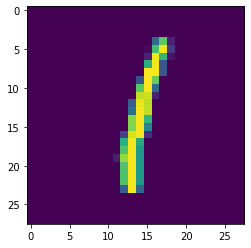

In [84]:
predict_single(parameters, 3)
chosen = np.array(random.sample(range(12655), 3000)).reshape(3000,1)
Xbinarytestnew = Xbinarytest[chosen].reshape(3000,784)/255
Xbinarytestnew = np.transpose(Xbinarytestnew)
Ybinarytestnew = Ybinarytest[chosen].reshape(3000,1)
finalshowimgnew = Xbinarytestnew[:,1].reshape(28,28)

accuracy, incorrect_guess_list = predict_multiple(parameters, Xbinarytestnew, Ybinarytestnew, return_false_indexes = True)
print(accuracy + str(incorrect_guess_list))
finalshowimgnew = Xbinarytestnew[:,45].reshape(28,28)
pyplot.imshow(finalshowimgnew)
